# Chargement des bibliothèques

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("pastel")



# Chargement des données

In [3]:
df = pd.read_csv("shopping_trends_updated.csv")

# Exploration des données

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
gender_count = df.value_counts('Gender')

In [8]:
gender_count = gender_count.to_frame().reset_index()

# Visualisation des données

## Répartition des clients par sexe

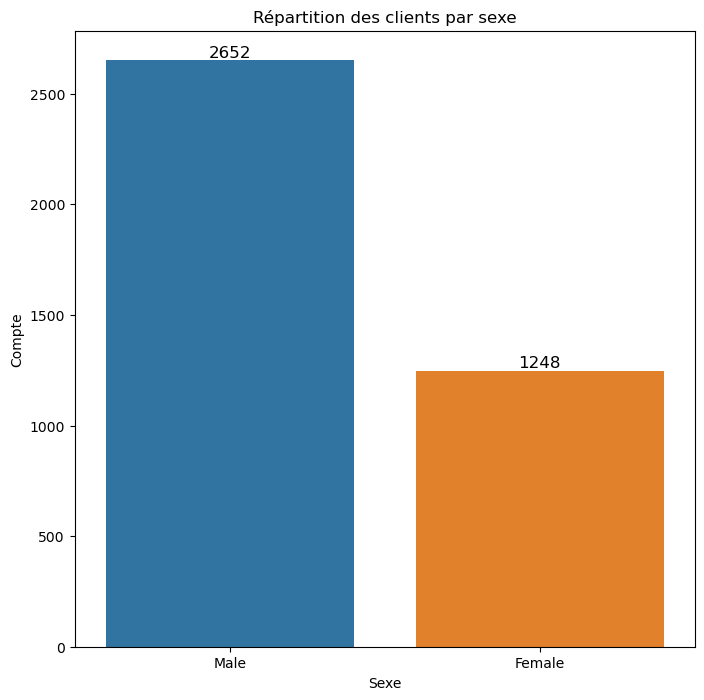

In [9]:
plt.figure(figsize=(8, 8))

ax = sns.barplot(data=gender_count, x='Gender', y='count')

# Ajoutez des étiquettes aux barres à partir du dataframe
for index, row in gender_count.iterrows():
    ax.text(index, row['count'], str(row['count']), ha='center', va='bottom', fontsize=12)

plt.title("Répartition des clients par sexe")
plt.xlabel("Sexe")
plt.ylabel("Compte")

plt.show()


## Distribution de l'âge

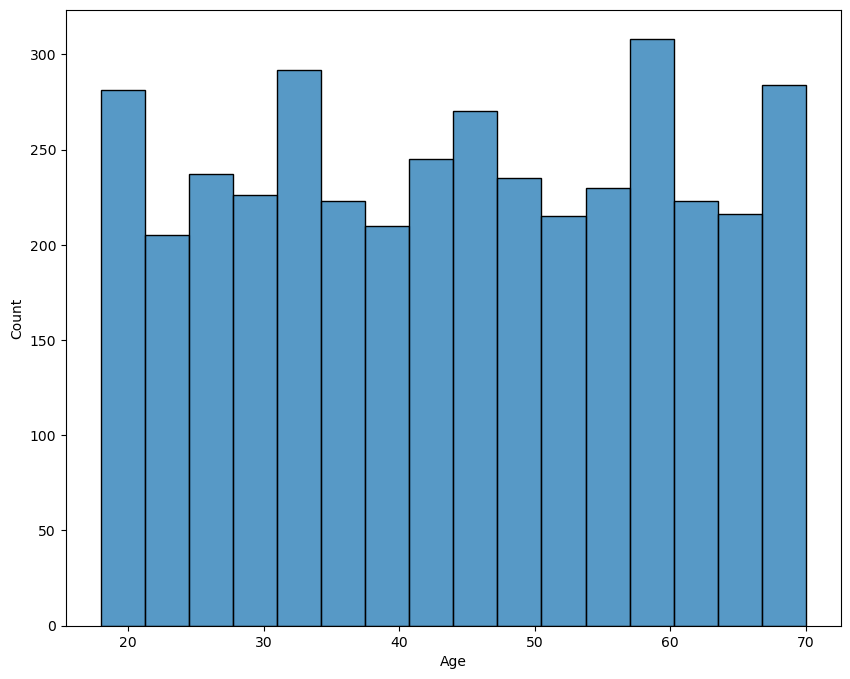

In [10]:
plt.figure(figsize=(10, 8))

ax = sns.histplot(data = df,
                  x = 'Age',
                  bins = "auto")

## Localisation des clients

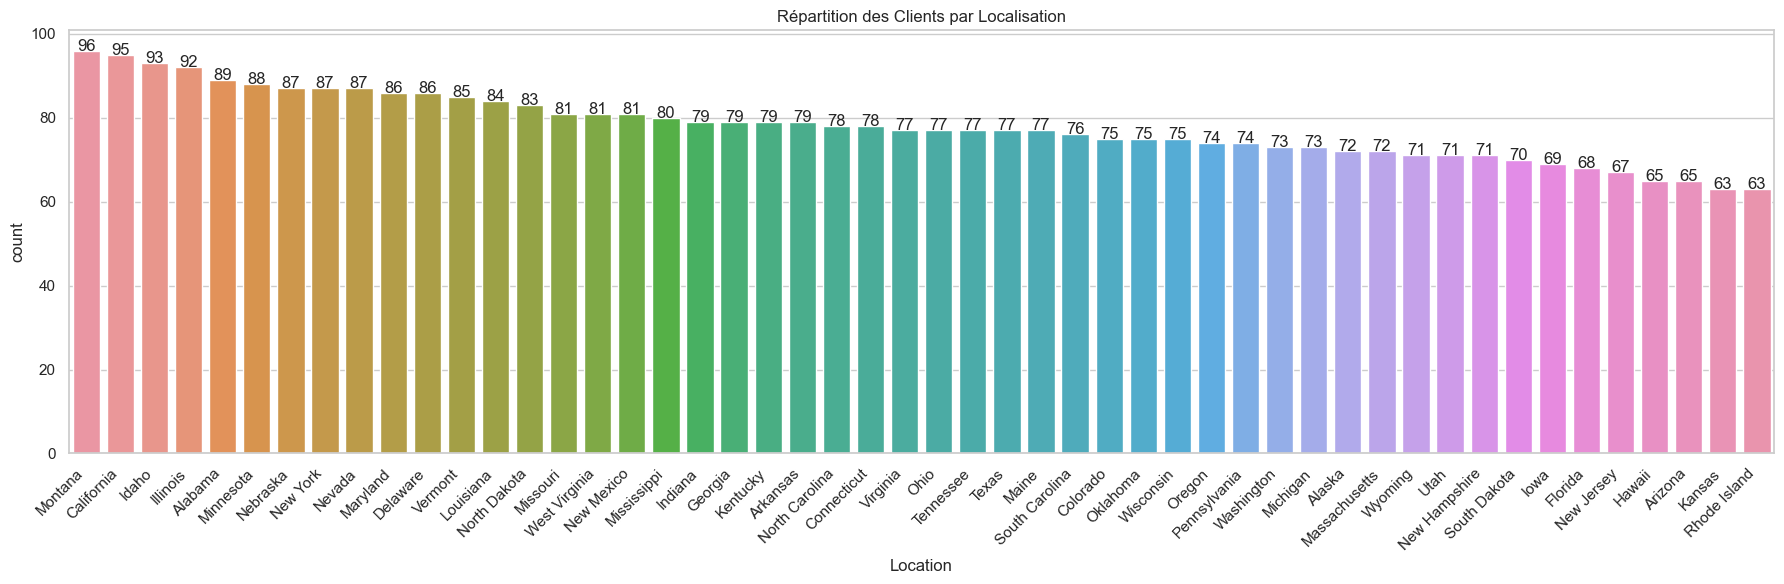

In [23]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(18, 6))

# Plot the distribution of customers by Location
ax = sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
ax.set_title('Répartition des Clients par Localisation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Show the plots
plt.tight_layout()
plt.show()


## Distribution des moyens de paiement

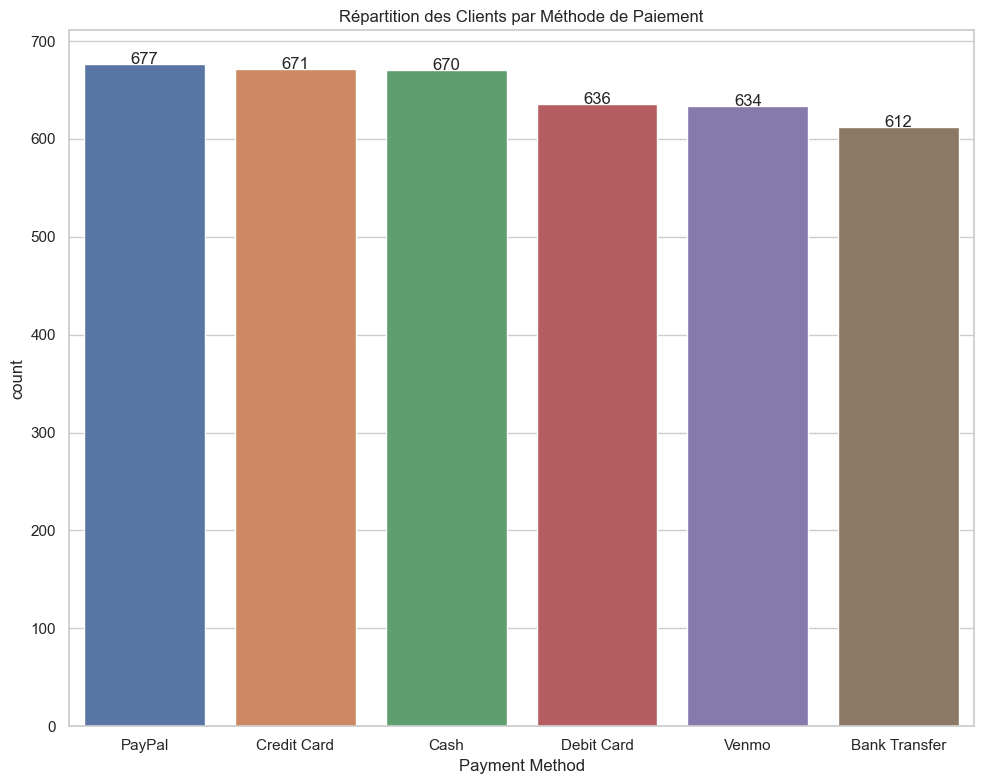

In [22]:
# Plot the distribution of customers by Payment Method
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='Payment Method', order=df['Payment Method'].value_counts().index)
ax.set_title('Répartition des Clients par Méthode de Paiement')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')


plt.tight_layout()
plt.show()

## Habitude de consommation

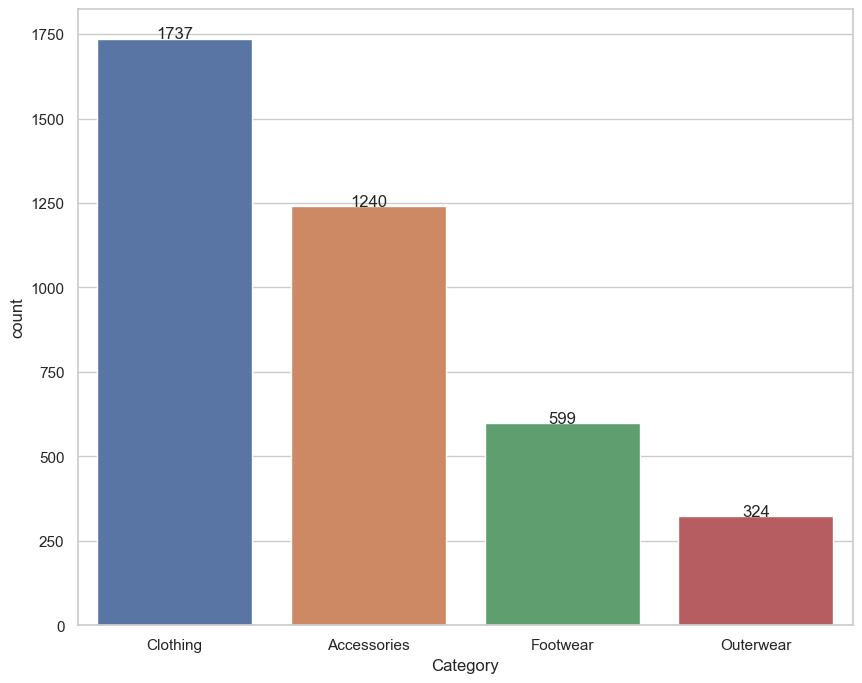

In [21]:
plt.figure(figsize = (10, 8))

ax = sns.countplot(data = df,
              x = 'Category',
              order = df.Category.value_counts().index)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')


plt.show()

## Distribution de la valeur du panier

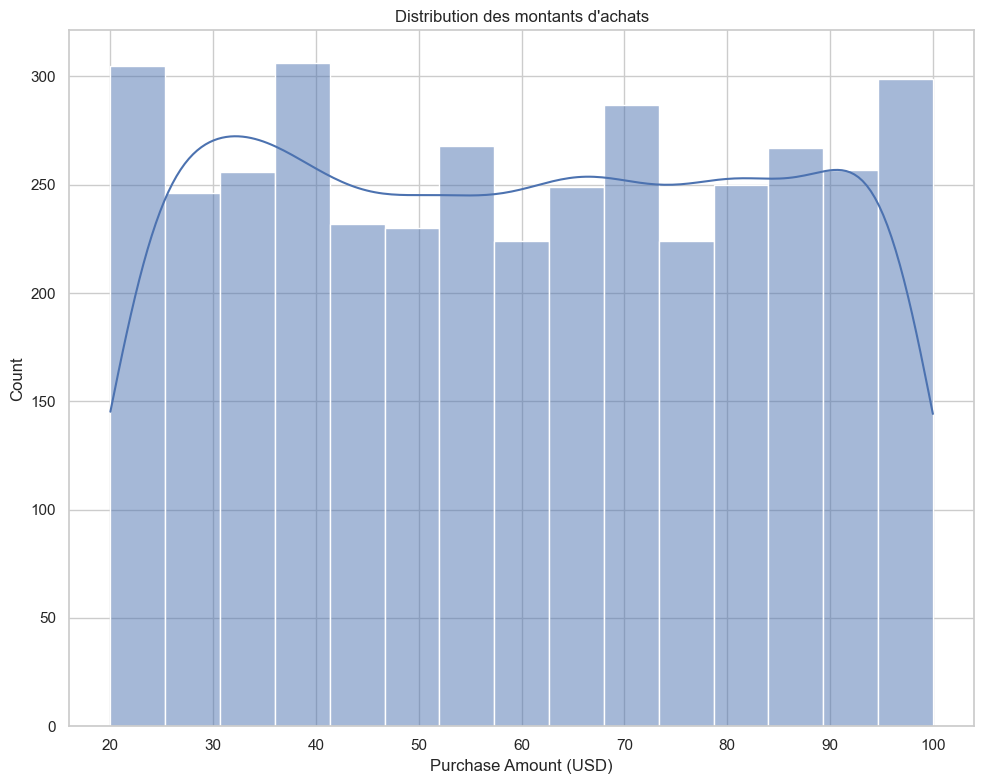

In [24]:
plt.figure(figsize = (10, 8))

ax = sns.histplot(df['Purchase Amount (USD)'], bins='auto', kde=True)

ax.set_title("Distribution des montants d'achats")

plt.tight_layout()
plt.show()


## Saisonnalité des achats

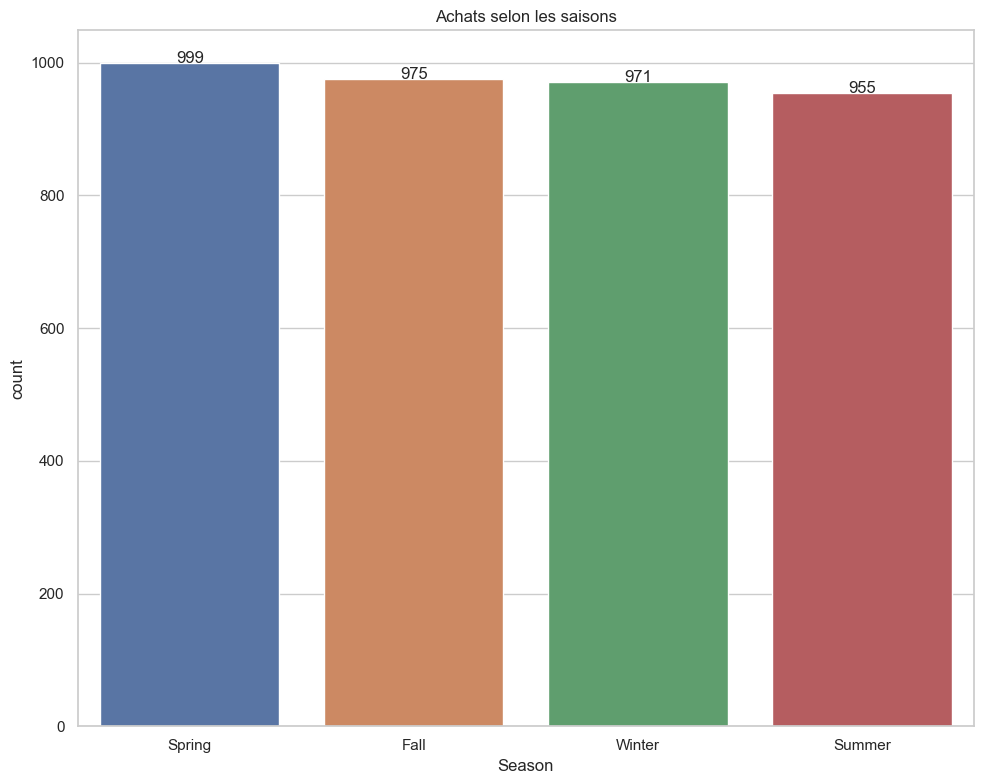

In [25]:
plt.figure(figsize= (10, 8))

ax = sns.countplot(df,
                   x = 'Season',
                   order = df['Season'].value_counts().index)

ax.set_title("Achats selon les saisons")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()

## Fréquence des achats

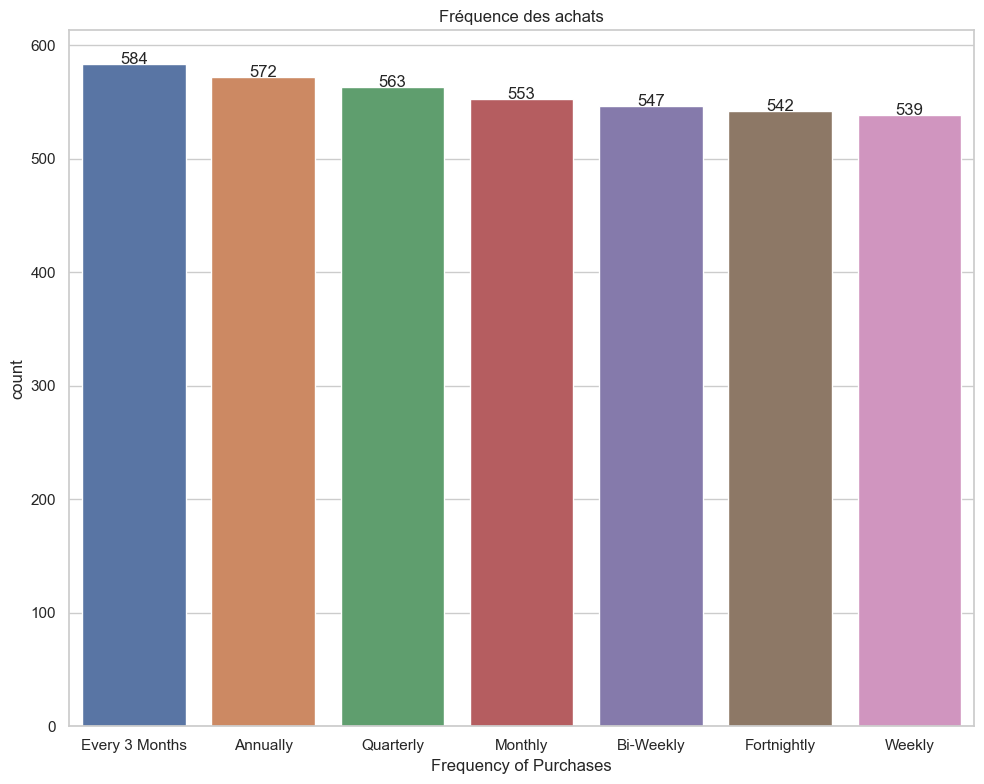

In [27]:
plt.figure(figsize = (10, 8))

ax = sns.countplot(df,
                   x = "Frequency of Purchases",
                   order = df['Frequency of Purchases'].value_counts().index)

ax.set_title("Fréquence des achats")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()

## Analyse par groupes d'âge

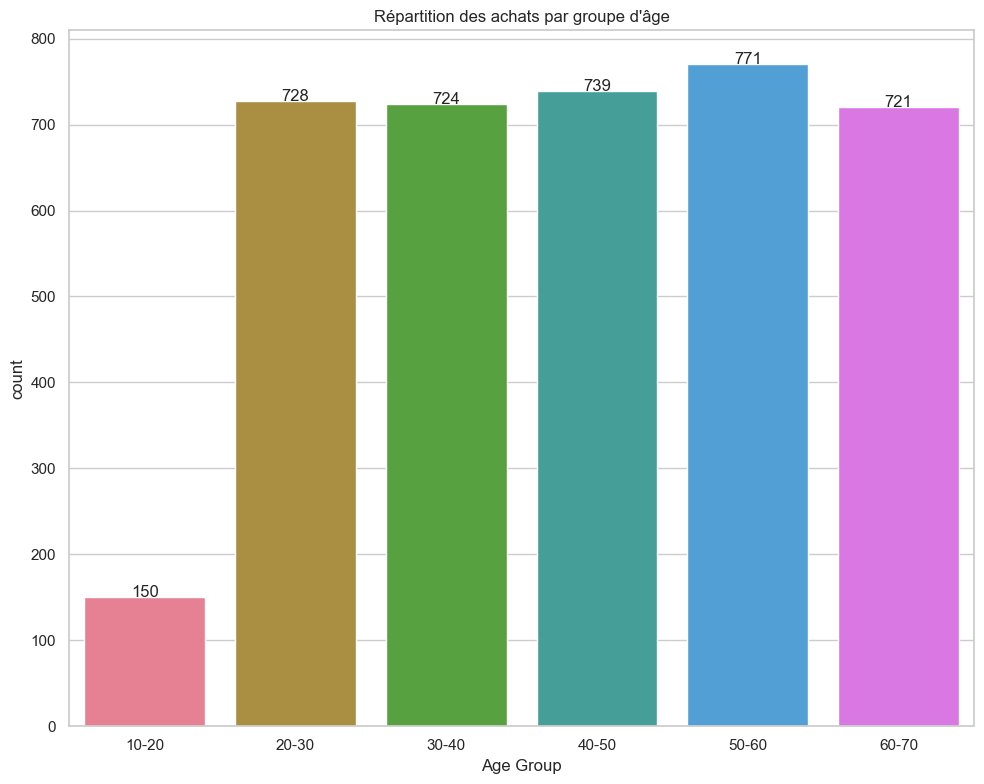

In [44]:
age_bins = list(range(10, 71, 10))
age_labels = ["10-20", "20-30", "30-40", "40-50", "50-60", "60-70"]

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize = (10, 8))

ax = sns.countplot(data = df,
                   x = 'Age Group',
                   order = age_labels,
                   palette = 'husl')

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

ax.set_title("Répartition des achats par groupe d'âge")

plt.tight_layout()
plt.show()

## Utilisation des codes promo

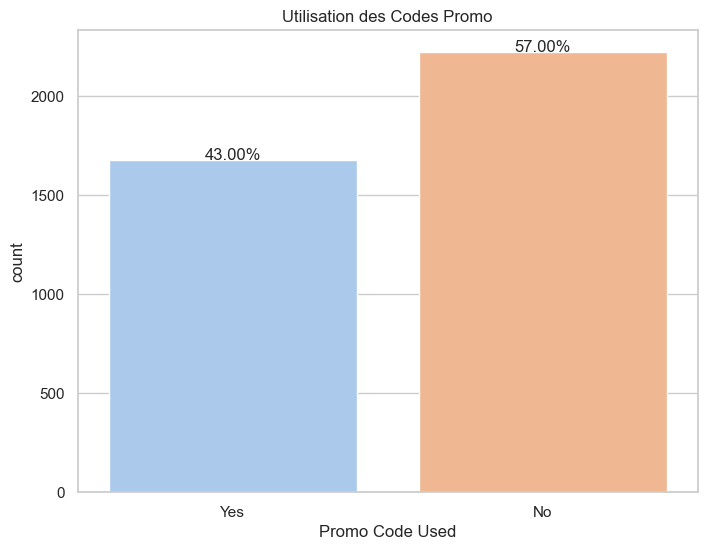

In [52]:
total = len(df)
yes_count = len(df[df['Promo Code Used'] == 'Yes'])
no_count = len(df[df['Promo Code Used'] == 'No'])
yes_percentage = (yes_count / total) * 100
no_percentage = (no_count / total) * 100

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Promo Code Used')
ax.set_title('Utilisation des Codes Promo')

ax.annotate(f'{yes_percentage:.2f}%', (0, yes_count), ha='center', va='baseline')
ax.annotate(f'{no_percentage:.2f}%', (1, no_count), ha='center', va='baseline')

plt.show()


## Méthodes d'expéditions préférées

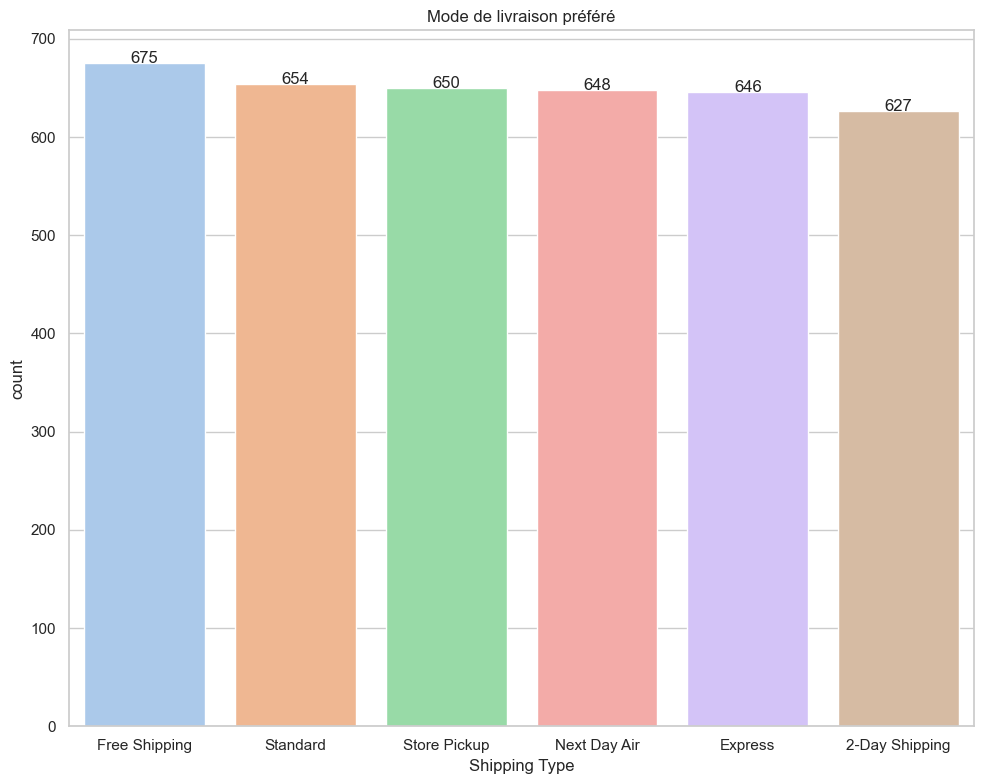

In [53]:
plt.figure(figsize=(10, 8))

ax = sns.countplot(data = df,
                   x = 'Shipping Type',
                   order = df['Shipping Type'].value_counts().index)

ax.set_title("Mode de livraison préféré")

for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

plt.tight_layout()
plt.show()